<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author:[Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #1 (demo)
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg).**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [4]:
# You code here
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [7]:
# You code here
data[data['sex']=='Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [17]:
# You code here
"{0:.2%}".format(data[data['native-country']=='Germany'].shape[0]/data.shape[0])

'0.42%'

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [20]:
# You code here
print(data[data['salary']=='>50K']['age'].mean())
print(data[data['salary']=='>50K']['age'].std())
print(data[data['salary']=='<=50K']['age'].mean())
print(data[data['salary']=='<=50K']['age'].std())

44.24984058155847
10.519027719851826
36.78373786407767
14.02008849082488


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [23]:
# You code here
print(data[data['salary']=='>50K']['education'].value_counts())
print('FALSE')


Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64
FALSE


**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [29]:
# You code here
data.groupby(['race']).describe()

age                                                \
                      count       mean        std   min   25%   50%   75%   
race                                                                        
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                           fnlwgt                                         \
                     max    count           mean            std      min   
race                                                                       
Amer-Indian-Eskimo  82.0    311.0  120831.147910   88338.636336  12285.0   
Asian-Pac-Islander  90.0   1039.0  159940.609240   85122.307505  14878.0   
Black               90.0   3124.0  228013.124200  123600.677422  19752.0   
Other               77.0    271.0  197124.191882   88856.775370  24562.0   
White               90.0  27816.0  187298.064280  103124.944196  18827.0   

                                                            education-num  \
                         25%       50%       75%        max         count   
race                                                                        
Amer-Indian-Eskimo   35036.5  102541.0  176142.0   445168.0         311.0   
Asian-Pac-Islander   93321.0  143098.0  194456.0   506329.0        1039.0   
Black               148212.0  205934.0  281693.0  1268339.0        3124.0   
Other               138103.0  188793.0  240091.0   481175.0         271.0   
White               116902.5  177627.0  233542.5  1484705.0       27816.0   

                                                                     \
                         mean       std  min  25%   50%   75%   max   
race                                                                  
Amer-Indian-Eskimo   9.311897  2.310387  2.0  9.0   9.0  10.0  16.0   
Asian-Pac-Islander  10.960539  2.811582  1.0  9.0  10.0  13.0  16.0   
Black                9.486236  2.297893  1.0  9.0   9.0  10.0  16.0   
Other                8.841328  3.226153  1.0  7.5   9.0  10.0  16.0   
White               10.135246  2.570307  1.0  9.0  10.0  13.0  16.0   

                   capital-gain                                                \
                          count         mean          std  min  25%  50%  75%   
race                                                                            
Amer-Indian-Eskimo        311.0   625.266881  2753.238961  0.0  0.0  0.0  0.0   
Asian-Pac-Islander       1039.0  1478.358037  9986.156906  0.0  0.0  0.0  0.0   
Black                    3124.0   609.940461  5139.653447  0.0  0.0  0.0  0.0   
Other                     271.0   934.660517  8625.128995  0.0  0.0  0.0  0.0   
White                   27816.0  1121.660375  7504.533302  0.0  0.0  0.0  0.0   

                            capital-loss                                   \
                        max        count       mean         std  min  25%   
race                                                                        
Amer-Indian-Eskimo  27828.0        311.0  34.176849  245.583106  0.0  0.0   
Asian-Pac-Islander  99999.0       1039.0  97.222329  423.556931  0.0  0.0   
Black               99999.0       3124.0  60.385083  337.394121  0.0  0.0   
Other               99999.0        271.0  61.070111  322.452705  0.0  0.0   
White               99999.0      27816.0  90.806155  410.833347  0.0  0.0   

                                     hours-per-week                        \
                    50%  75%     max          count       mean        std   
race                                                                        
Amer-Indian-Eskimo  0.0  0.0  1980.0          311.0  40.048232  11.695364   
Asian-Pac-Islander  0.0  0.0  2457.0  

In [31]:
data[data['race']=='Amer-Indian-Eskimo']['age'].max()

82

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [47]:
data[data['salary']=='>50K'].groupby('marital-status').describe()

age                                                  \
                        count       mean        std   min    25%   50%    75%   
marital-status                                                                  
Divorced                463.0  45.645788   8.554373  24.0  40.00  45.0  51.00   
Married-AF-spouse        10.0  31.300000   6.700746  22.0  27.50  29.5  34.75   
Married-civ-spouse     6692.0  44.436192  10.383282  19.0  37.00  44.0  51.00   
Married-spouse-absent    34.0  47.323529  10.803256  28.0  41.25  47.5  51.75   
Never-married           491.0  38.217923  10.262840  19.0  30.50  36.0  44.00   
Separated                66.0  42.348485  10.043739  23.0  34.25  42.0  48.50   
Widowed                  85.0  58.588235  11.536994  29.0  51.00  58.0  67.00   

                             fnlwgt                                         \
                        max   count           mean            std      min   
marital-status                                                               
Divorced               69.0   463.0  185425.691145   98586.532618  20296.0   
Married-AF-spouse      43.0    10.0  166411.200000  125626.413447  26892.0   
Married-civ-spouse     90.0  6692.0  187893.779737  102330.197150  14878.0   
Married-spouse-absent  77.0    34.0  159234.735294   84719.581980  27444.0   
Never-married          90.0   491.0  196258.124236  111550.846060  23438.0   
Separated              64.0    66.0  210674.075758  100937.924364  27766.0   
Widowed                81.0    85.0  159583.705882   82429.176123  23074.0   

                                                                  \
                             25%       50%        75%        max   
marital-status                                                     
Divorced               119602.00  176037.0  228547.50   682947.0   
Married-AF-spouse       52022.25  179044.0  221776.75   436341.0   
Married-civ-spouse     119101.00  176026.5  231386.00  1226583.0   
Married-spouse-absent  109759.50  164552.0  207886.50   344415.0   
Never-married          122622.50  178134.0  235195.50  1033222.0   
Separated              141621.25  195111.5  270711.75   581071.0   
Widowed                102359.00  150389.0  214627.00   411007.0   

                      education-num                                         \
                              count       mean       std  min    25%   50%   
marital-status                                                               
Divorced                      463.0  11.881210  2.339417  5.0  10.00  13.0   
Married-AF-spouse              10.0  11.000000  1.825742  9.0   9.25  10.5   
Married-civ-spouse           6692.0  11.525852  2.375349  2.0   9.00  12.0   
Married-spouse-absent          34.0  12.088235  2.597990  4.0  10.00  13.0   
Never-married                 491.0  12.529532  2.307186  3.0  11.00  13.0   
Separated                      66.0  12.166667  2.291008  6.0  10.00  13.0   
Widowed                        85.0  11.047059  2.586162  4.0   9.00  11.0   

                                   capital-gain                             \
                         75%   max        count         mean           std   
marital-status                                                               
Divorced               14.00  16.0        463.0  5781.812095  16205.092176   
Married-AF-spouse      13.00  13.0         10.0   729.800000   2307.830236   
Married-civ-spouse     13.00  16.0       6692.0  3678.163927  14262.530396   
Married-spouse-absent  13.75  16.0         34.0  6836.647059  18411.169143   
Never-married          14.00  16.0        491.0  6137.576375  16295.894797   
Separated              14.00  16.0         66.0  6614.727273  18159.752130   
Widowed                13.00  16.0         85.0  5071.117647  12848.662728   

                                                       capital-loss  \
                       min  25%  50%      75%      max        count   
marital-status                                   

In [59]:
# You code here`
data[(data['salary']=='>50K') & (~data['marital-status'].str.contains('Married'))].shape

(1105, 15)

In [60]:
data[(data['salary']=='>50K') & (data['marital-status'].str.contains('Married'))].shape

(6736, 15)

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [9]:
# You code here
maxx = data['hours-per-week'].max()
workers = data[data['hours-per-week'] == maxx]
print(workers.count()[0])
print(workers[workers['salary']=='>50K'].count()[0]/workers.count()[0])

85
0.29411764705882354


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [49]:
# You code here
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [197]:
import time
import pandasql as ps


In [196]:
data.shape

(32561, 17)

In [154]:
data['indexx'] = data.index

In [155]:
dataLeft = pd.DataFrame([data['age'],data['workclass'],data['fnlwgt'], data['education'],data['indexx']]).T

In [156]:
dataRight = pd.DataFrame([data['relationship'],data['race'],data['sex'], data['capital-gain'],data['indexx']]).T

In [157]:
dataLeft = dataLeft.sample(frac=1).reset_index()
dataRight = dataRight.sample(frac=1).reset_index()

In [66]:
dataLeft

,level_0,age,workclass,fnlwgt,education,index
0,14065,38,Private,177121,Some-college,14065
1,19347,41,Private,424478,Some-college,19347
2,4627,58,?,198478,7th-8th,4627
3,471,22,?,139883,Some-college,471
4,27642,73,?,131982,Bachelors,27642


In [76]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [183]:
def concTime(dfs, length):
    start = time.time()
    result = pd.concat([dfs[0][:length], dfs[1][:length]], ignore_index=True, sort=False).dropna()
    end = time.time()
    result = result
    return end - start

In [170]:
def joinTime(dfs, length):
    datae = dfs[0][:length]
    datad = dfs[1][:length]
    q = """
    SELECT *
    FROM (select * from datae) as e
    join (select * from datad) as d on d.indexx = e.indexx
    ;
    """
    start = time.time()
    result = sqldf(q, locals())
    end = time.time()
    return end - start

In [266]:
def concdfTest(dfs, length):
    timeP = concTime(dfs,length)
    timeS = joinTime(dfs,length)
    return [timeP - timeS,timeP,timeS]

In [271]:
def comparisonJoin():
    comp = (100,1000,2000,5000,10000,20000,30000)
    results = [[0,0,0,0]]
    for i in comp:
        results += [concdfTest((dataLeft,dataRight),i)+[i]]
    return results[1:]

In [272]:
dd = pd.DataFrame(comparisonJoin(), columns=['delta','concat','pandasql','size'])
dd

[[0, 0, 0, 0], [-0.006545066833496094, 0.0040013790130615234, 0.010546445846557617, 100], [-0.02300429344177246, 0.005002021789550781, 0.028006315231323242, 1000], [-0.039011240005493164, 0.006000995635986328, 0.04501223564147949, 2000], [-0.09302163124084473, 0.00900125503540039, 0.10202288627624512, 5000], [-0.194044828414917, 0.016002655029296875, 0.21004748344421387, 10000], [-0.486621618270874, 0.028006553649902344, 0.5146281719207764, 20000], [-0.7651257514953613, 0.04200935363769531, 0.8071351051330566, 30000]]


,delta,concat,pandasql,size
0,-0.006545,0.004001,0.010546,100
1,-0.023004,0.005002,0.028006,1000
2,-0.039011,0.006001,0.045012,2000
3,-0.093022,0.009001,0.102023,5000
4,-0.194045,0.016003,0.210047,10000
5,-0.486622,0.028007,0.514628,20000
6,-0.765126,0.042009,0.807135,30000


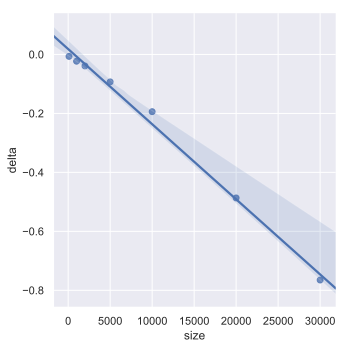

In [274]:
import seaborn as sns; sns.set(color_codes=True)

g = sns.lmplot(x="size", y="delta", data=dd)

In [253]:
def aggTime(dfs, length):
    start = time.time()
    result = dfs[:length].groupby(by='sex').agg({'hours-per-week':'mean','education-num':'mean','age':'mean'})
    end = time.time()
    result = result
    return end - start 

In [244]:
def sqlTime(dfs, length):
    dfd = dfs[:length]
    q = """
    SELECT d.sex, AVG(d."hours-per-week") as avghoursperweek, AVG(d."education-num") as avgducationnum, AVG(d.age) as avgage
    FROM (select * from dfd) as d
    GROUP BY d.sex
    ;
    """
    start = time.time()
    result = sqldf(q, locals())
    end = time.time()
    return end - start

In [273]:
def aggTest(dfs, length):
    timeP = aggTime(dfs,length)
    timeS = sqlTime(dfs,length)
    return [timeP - timeS,timeP,timeS]

In [281]:
def comparisonAgg():
    comp = (100,1000,2000,5000,10000,20000,30000)
    results = [[0,0,0,0]]
    for i in comp:
        results += [aggTest(data,i)+[i]]
    return results[1:]

In [282]:
dd = pd.DataFrame(comparisonAgg(), columns=['delta','agg','pandasql','size'])
dd

,delta,agg,pandasql,size
0,-0.006011,0.004001,0.010012,100
1,-0.024005,0.003001,0.027006,1000
2,-0.043011,0.002000,0.045012,2000
3,-0.101023,0.002001,0.103024,5000
4,-0.196043,0.003001,0.199044,10000
5,-0.384086,0.004001,0.388087,20000
6,-0.631374,0.005001,0.636375,30000


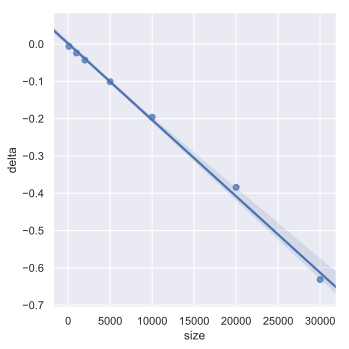

In [283]:
g = sns.lmplot(x="size", y="delta", data=dd)